## Parte I – Resolvendo um Problema Linearmente Separável

## Alunos: 
### - Luiz Carlos Glomyer Pereira Gomes Junior - 2015310021
### - Santiago Augusto de Souza Monteiro - 1915080043

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [13]:
def step(u):
  if (u >= 0):
    return (1.0)
  else:
    return (0.0)

def getNextWeightsVector(previousWeightsVector, error, inputAttributesVector):
  # Delta Rule
  learningRate = 0.1
  return (previousWeightsVector + learningRate * error * inputAttributesVector)

def getWeightedSum(inputAttributesVector, weightsVector):
  multiplicationOfVectors = inputAttributesVector * weightsVector
  return (multiplicationOfVectors.sum())

def getError(realOutput, outputDeducted):
  return (realOutput - outputDeducted)

def checkArrayEquality(array1, array2):
  return (np.array_equal(array1, array2))

def getWeightsVector():
  weightsVector = np.array([])
  for i in range(3):
    randomNumber = random.uniform(-0.5, 0.5)
    weightsVector = np.append(weightsVector, randomNumber)
  return (weightsVector)

def getOutputVector(data):
  outputVector = np.array([])
  for e in data:
    outputVector = np.append(outputVector, e[2])
  return outputVector

def addBiasToInputVector(inputVector):
  return np.insert(inputVector, 0, -1.0)

def getInputVectorGroup(data):
  inputVectorGroup = np.array([])
  for e in data:
    inputVector = e[:2]
    inputVectorWithBias = addBiasToInputVector(inputVector)
    inputVectorGroup = np.append(inputVectorGroup, inputVectorWithBias)
  return inputVectorGroup.reshape((1000, 3))

def teachPerceptron(data):
  deducedOutputVector = np.array([])
  outputVector = getOutputVector(data)
  weightsVector = getWeightsVector()
  inputVectorGroup = getInputVectorGroup(data)

  numberOfFitsInTheWeightVector = 0
  epoch = 0

  print("vetor de pesos: ", weightsVector)

  while (not checkArrayEquality(deducedOutputVector, outputVector)):
    epoch += 1
    localFits = 0

    for i in range(len(inputVectorGroup)):
      inputVector = inputVectorGroup[i]
      realOutput = outputVector[i]

      weightedSum = getWeightedSum(inputVector, weightsVector)
      outputDeducted = step(weightedSum)
      
      if (len(deducedOutputVector) == 1000):
        deducedOutputVector[i] = outputDeducted
      else:
        deducedOutputVector = np.insert(deducedOutputVector, i, outputDeducted)

      error = getError(realOutput, outputDeducted)

      if (error):
        weightsVector = getNextWeightsVector(weightsVector, error, inputVector)
        numberOfFitsInTheWeightVector += 1
        localFits += 1

    print(f"Época: {epoch} ")
    print(f"Número de ajustes feitos no vetor de pesos na época: {localFits}")
    print(f"Número de ajustes feitos no vetor de pesos até o momento: {numberOfFitsInTheWeightVector}")
    print()
  
  print("O número total de ajustes no vetor de pesos: ", numberOfFitsInTheWeightVector)
  print("número de épocas até a convergência: ", epoch)
  print("vetor de pesos final: ", weightsVector)


  data_array = getInputVectorGroup(data)
  data_array = np.delete(data_array, 0, 1)
  
  # Plot the vector
  plt.figure(figsize=(10, 5))
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.title('Vector Plot')

  for i, point in enumerate(data_array):
    if(outputVector[i] == 1):
        plt.scatter(point[0],point[1], s=10, color="red", marker="s")
    if(outputVector[i] == 0):
        plt.scatter(point[0],point[1], s=10, color="blue", marker="o")
  
  x = np.arange(min(data_array[:,:1]),max(data_array[:,:1]), 0.1)
  y = weightsVector[0]/weightsVector[2] - (weightsVector[1]/weightsVector[2] * x)
  
  plt.axline((x[0],y[0]), 
             (x[1],y[1]), 
             color="black", 
             linewidth=2)

  # Show the plot
  plt.show()

def teachPerceptronByEpoch(data, epoch):
  deducedOutputVector = np.array([])
  outputVector = getOutputVector(data)
  weightsVector = getWeightsVector()
  inputVectorGroup = getInputVectorGroup(data)

  numberOfFitsInTheWeightVector = 0

  print("vetor de pesos: ", weightsVector)

  for e in range(epoch):
    localFits = 0

    for i in range(len(inputVectorGroup)):
      inputVector = inputVectorGroup[i]
      realOutput = outputVector[i]

      weightedSum = getWeightedSum(inputVector, weightsVector)
      outputDeducted = step(weightedSum)
      
      if (len(deducedOutputVector) == 2400):
        deducedOutputVector[i] = outputDeducted
      else:
        deducedOutputVector = np.insert(deducedOutputVector, i, outputDeducted)

      error = getError(realOutput, outputDeducted)

      if (error):
        weightsVector = getNextWeightsVector(weightsVector, error, inputVector)
        numberOfFitsInTheWeightVector += 1
        localFits += 1

    print(f"Época: {e + 1} ")
    print(f"Número de ajustes feitos no vetor de pesos na época: {localFits}")
    print(f"Número de ajustes feitos no vetor de pesos até o momento: {numberOfFitsInTheWeightVector}")
    print()
  
  print("O número total de ajustes no vetor de pesos: ", numberOfFitsInTheWeightVector)
  print("vetor de pesos final: ", weightsVector)

vetor de pesos:  [-0.09661449  0.18475174  0.10521921]
Época: 1 
Número de ajustes feitos no vetor de pesos na época: 27
Número de ajustes feitos no vetor de pesos até o momento: 27

Época: 2 
Número de ajustes feitos no vetor de pesos na época: 0
Número de ajustes feitos no vetor de pesos até o momento: 27

O número total de ajustes no vetor de pesos:  27
número de épocas até a convergência:  2
vetor de pesos final:  [   0.60338551  232.52135174 -231.55869079]


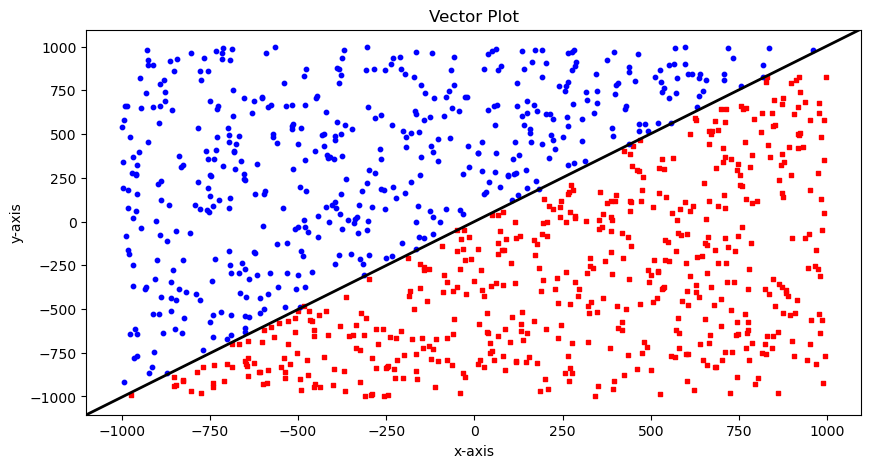

In [14]:
path = os.path.join("data", "dataAll.txt")
data = np.fromfile(path).reshape((1000, 3))

teachPerceptron(data)

In [10]:
teachPerceptronByEpoch(data, 3)

vetor de pesos:  [-0.3361598  -0.35707508 -0.42795586]
Época: 1 
Número de ajustes feitos no vetor de pesos na época: 12
Número de ajustes feitos no vetor de pesos até o momento: 12

Época: 2 
Número de ajustes feitos no vetor de pesos na época: 0
Número de ajustes feitos no vetor de pesos até o momento: 12

Época: 3 
Número de ajustes feitos no vetor de pesos na época: 0
Número de ajustes feitos no vetor de pesos até o momento: 12

O número total de ajustes no vetor de pesos:  12
vetor de pesos final:  [-1.36159799e-01  1.51273795e+02 -1.50725446e+02]
